In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
import warnings
import pickle
from scipy import stats
import imblearn
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data_Train.xlsx to Data_Train.xlsx


In [ ]:
import io
import pandas as pd
data=pd.read_excel('Data_Train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
category=['Airline','Source','Destination','Additional_Info']
for i in category:
  print(i, data[i].unique())

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


In [ ]:
data.Date_of_Journey=data.Date_of_Journey.str.split('/')
data.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [ ]:
data['Date']=data.Date_of_Journey.str[0]
data['Month']=data.Date_of_Journey.str[1]
data['Year']=data.Date_of_Journey.str[2]

In [ ]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
data.Route=data.Route.str.split('->')
data.Route

0                    [BLR → DEL]
1        [CCU → IXR → BBI → BLR]
2        [DEL → LKO → BOM → COK]
3              [CCU → NAG → BLR]
4              [BLR → NAG → DEL]
                  ...           
10678                [CCU → BLR]
10679                [CCU → BLR]
10680                [BLR → DEL]
10681                [BLR → DEL]
10682    [DEL → GOI → BOM → COK]
Name: Route, Length: 10683, dtype: object

In [ ]:
data['City1']=data.Route.str[0]
data['City2']=data.Route.str[1]
data['City3']=data.Route.str[2]
data['City4']=data.Route.str[3]
data['City5']=data.Route.str[4]
data['City6']=data.Route.str[5]

In [ ]:
data.Dep_Time=data.Dep_Time.str.split(':')

In [ ]:
data['Dep_Time_Hour']=data.Dep_Time.str[0]
data['Dep_Time_Mins']=data.Dep_Time.str[1]

In [ ]:
data.Arrival_Time=data.Arrival_Time.str.split(' ')

In [ ]:
data['Arrival_date']=data.Arrival_Time.str[1]
data['Time_of_Arrival']=data.Arrival_Time.str[0]

In [ ]:
data['Time_of_Arrival']=data.Time_of_Arrival.str.split(':')

In [ ]:
data['Arrival_time_Hour']=data.Time_of_Arrival.str[0]
data['Arrival_time_Mins']=data.Time_of_Arrival.str[1]

In [ ]:
data.Duration=data.Duration.str.split('')

In [ ]:
data['Travel_Hours']=data.Duration.str[0]
data['Travel_Hours']=data['Travel_Hours'].str.split('h')
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours=data.Travel_Hours
data['Travel_Mins']=data.Duration.str[1]

data.Travel_Mins=data.Travel_Mins.str.split('m')
data.Travel_Mins=data.Travel_Mins.str[0]

In [ ]:
data.Total_Stops.replace('non_stop',0,inplace=True)
data.Total_Stops=data.Total_Stops.str.split('')
data.Total_Stops=data.Total_Stops.str[0]


In [ ]:
data.Total_Stops.replace('non_stop',0,inplace=True)
data.Total_Stops=data.Total_Stops.str.split('')
data.Total_Stops=data.Total_Stops.str[0]

In [ ]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
data.Additional_Info.replace('No Info','No info',inplace=True)

In [ ]:
data.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    1
City2                10683
City3                10683
City4                10683
City5                10683
City6                10683
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date             0
Time_of_Arrival          0
Arrival_time_Hour        0
Arrival_time_Mins    10683
Travel_Hours             0
Travel_Mins              0
dtype: int64

In [ ]:
data.drop(['City4','City5','City6'],axis=1,inplace=True)

In [ ]:
data.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    1
City2                10683
City3                10683
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date             0
Time_of_Arrival          0
Arrival_time_Hour        0
Arrival_time_Mins    10683
Travel_Hours             0
Travel_Mins              0
dtype: int64

In [ ]:

data['City1'].fillna('None',inplace=True)
data['City2'].fillna('None',inplace=True)
data['City3'].fillna('None',inplace=True)

In [ ]:
data['Arrival_date'].fillna(data['Date'],inplace=True)

In [ ]:
data['Total_Stops'].fillna(0,inplace=True)

In [ ]:
data['Route'].fillna(0,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            10683 non-null  object 
 1   Date_of_Journey    10683 non-null  object 
 2   Source             10683 non-null  object 
 3   Destination        10683 non-null  object 
 4   Route              10683 non-null  object 
 5   Dep_Time           10683 non-null  object 
 6   Arrival_Time       10683 non-null  object 
 7   Duration           10683 non-null  object 
 8   Total_Stops        10683 non-null  object 
 9   Additional_Info    10683 non-null  object 
 10  Price              10683 non-null  int64  
 11  Date               10683 non-null  object 
 12  Month              10683 non-null  object 
 13  Year               10683 non-null  object 
 14  City1              10683 non-null  object 
 15  City2              10683 non-null  object 
 16  City3              106

In [ ]:
data.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    0
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              0
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    0
City2                    0
City3                    0
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date             0
Time_of_Arrival          0
Arrival_time_Hour        0
Arrival_time_Mins    10683
Travel_Hours             0
Travel_Mins              0
dtype: int64

In [ ]:
#changing the numerical columns from object yo int
#data.Total_Stops=data.Total_Stops.astype('int64')
data.Date=data.Date.astype('int64')
data.Month=data.Month.astype('int64')
data.Year=data.Year.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Mins=data.Dep_Time_Mins.astype('int64')
data.Arrival_date=data.Arrival_date.astype('int64')
data.Arrival_Time_Hour=data.Arrival_time_Hour.astype('int64')
#data.Total_Stops=data.Total_Stops.astype('int64')
data.Travel_Mins=data.Travel_Mins.astype('int64')


In [ ]:
data[data['Travel_Hours']=='5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Time_of_Arrival,Arrival_time_Hour,Arrival_time_Mins,Travel_Hours,Travel_Mins


In [ ]:
data.drop(index=6474,inplace=True,axis=0)

In [ ]:
categorical=['Airline','Source','Destination','Additional_Info']
numerical=['Total_Stops','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date','Arrival_Time_Hour','Arrival_Time_Mins','Travel_Hours','Travel_Mins']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data.Airline = le.fit_transform(data.Airline)
data.Source= le.fit_transform(data.Source)
data.Destination = le.fit_transform(data.Destination)
data.City1= le.fit_transform(data.City1)
data.City2= le.fit_transform(data.City2)
data.City3= le.fit_transform(data.City3)
data.Additional_Info= le.fit_transform(data.Additional_Info)


In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Time_of_Arrival,Arrival_time_Hour,Arrival_time_Mins,Travel_Hours,Travel_Mins
0,3,"[24, 03, 2019]",0,5,[BLR → DEL],"[22, 20]","[01:10, 22, Mar]","[, 2, h, , 5, 0, m, ]",,7,...,0,0,2,2,1,[0],0,NaN,,2
1,1,"[1, 05, 2019]",3,0,[CCU → IXR → BBI → BLR],"[05, 50]",[13:15],"[, 7, h, , 2, 5, m, ]",,7,...,0,0,0,5,3,[1],1,NaN,,7
2,4,"[9, 06, 2019]",2,1,[DEL → LKO → BOM → COK],"[09, 25]","[04:25, 10, Jun]","[, 1, 9, h, ]",,7,...,0,0,0,9,4,[0],0,NaN,,1
3,3,"[12, 05, 2019]",3,0,[CCU → NAG → BLR],"[18, 05]",[23:30],"[, 5, h, , 2, 5, m, ]",,7,...,0,0,1,8,3,[2],2,NaN,,5
4,3,"[01, 03, 2019]",0,5,[BLR → NAG → DEL],"[16, 50]",[21:35],"[, 4, h, , 4, 5, m, ]",,7,...,0,0,1,6,1,[2],2,NaN,,4


In [ ]:
data = data[['Airline','Source', 'Destination','Date','Month','Year','Dep_Time_Mins','Arrival_date','Price']]
data.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Mins,Arrival_date,Price
0,3,0,5,24,3,2019,2,1,3897
1,1,3,0,1,5,2019,5,3,7662
2,4,2,1,9,6,2019,9,4,13882
3,3,3,0,12,5,2019,8,3,6218
4,3,0,5,1,3,2019,6,1,13302


In [ ]:
data.describe()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Mins,Arrival_date,Price
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.0,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952069,1.435967,13.509081,4.708762,2019.0,4.896274,4.380172,9086.292735
std,2.352090,1.177110,1.474773,8.479363,1.164294,0.0,3.054280,3.273066,4610.885695
min,0.000000,0.000000,0.000000,1.000000,3.000000,2019.0,0.000000,0.000000,1759.000000
25%,3.000000,2.000000,0.000000,6.000000,3.000000,2019.0,2.000000,1.000000,5277.000000
50%,4.000000,2.000000,1.000000,12.000000,5.000000,2019.0,6.000000,4.000000,8372.000000
75%,4.000000,3.000000,2.000000,21.000000,6.000000,2019.0,7.000000,8.000000,12373.000000
max,11.000000,4.000000,5.000000,27.000000,6.000000,2019.0,9.000000,9.000000,79512.000000


KeyError: ignored

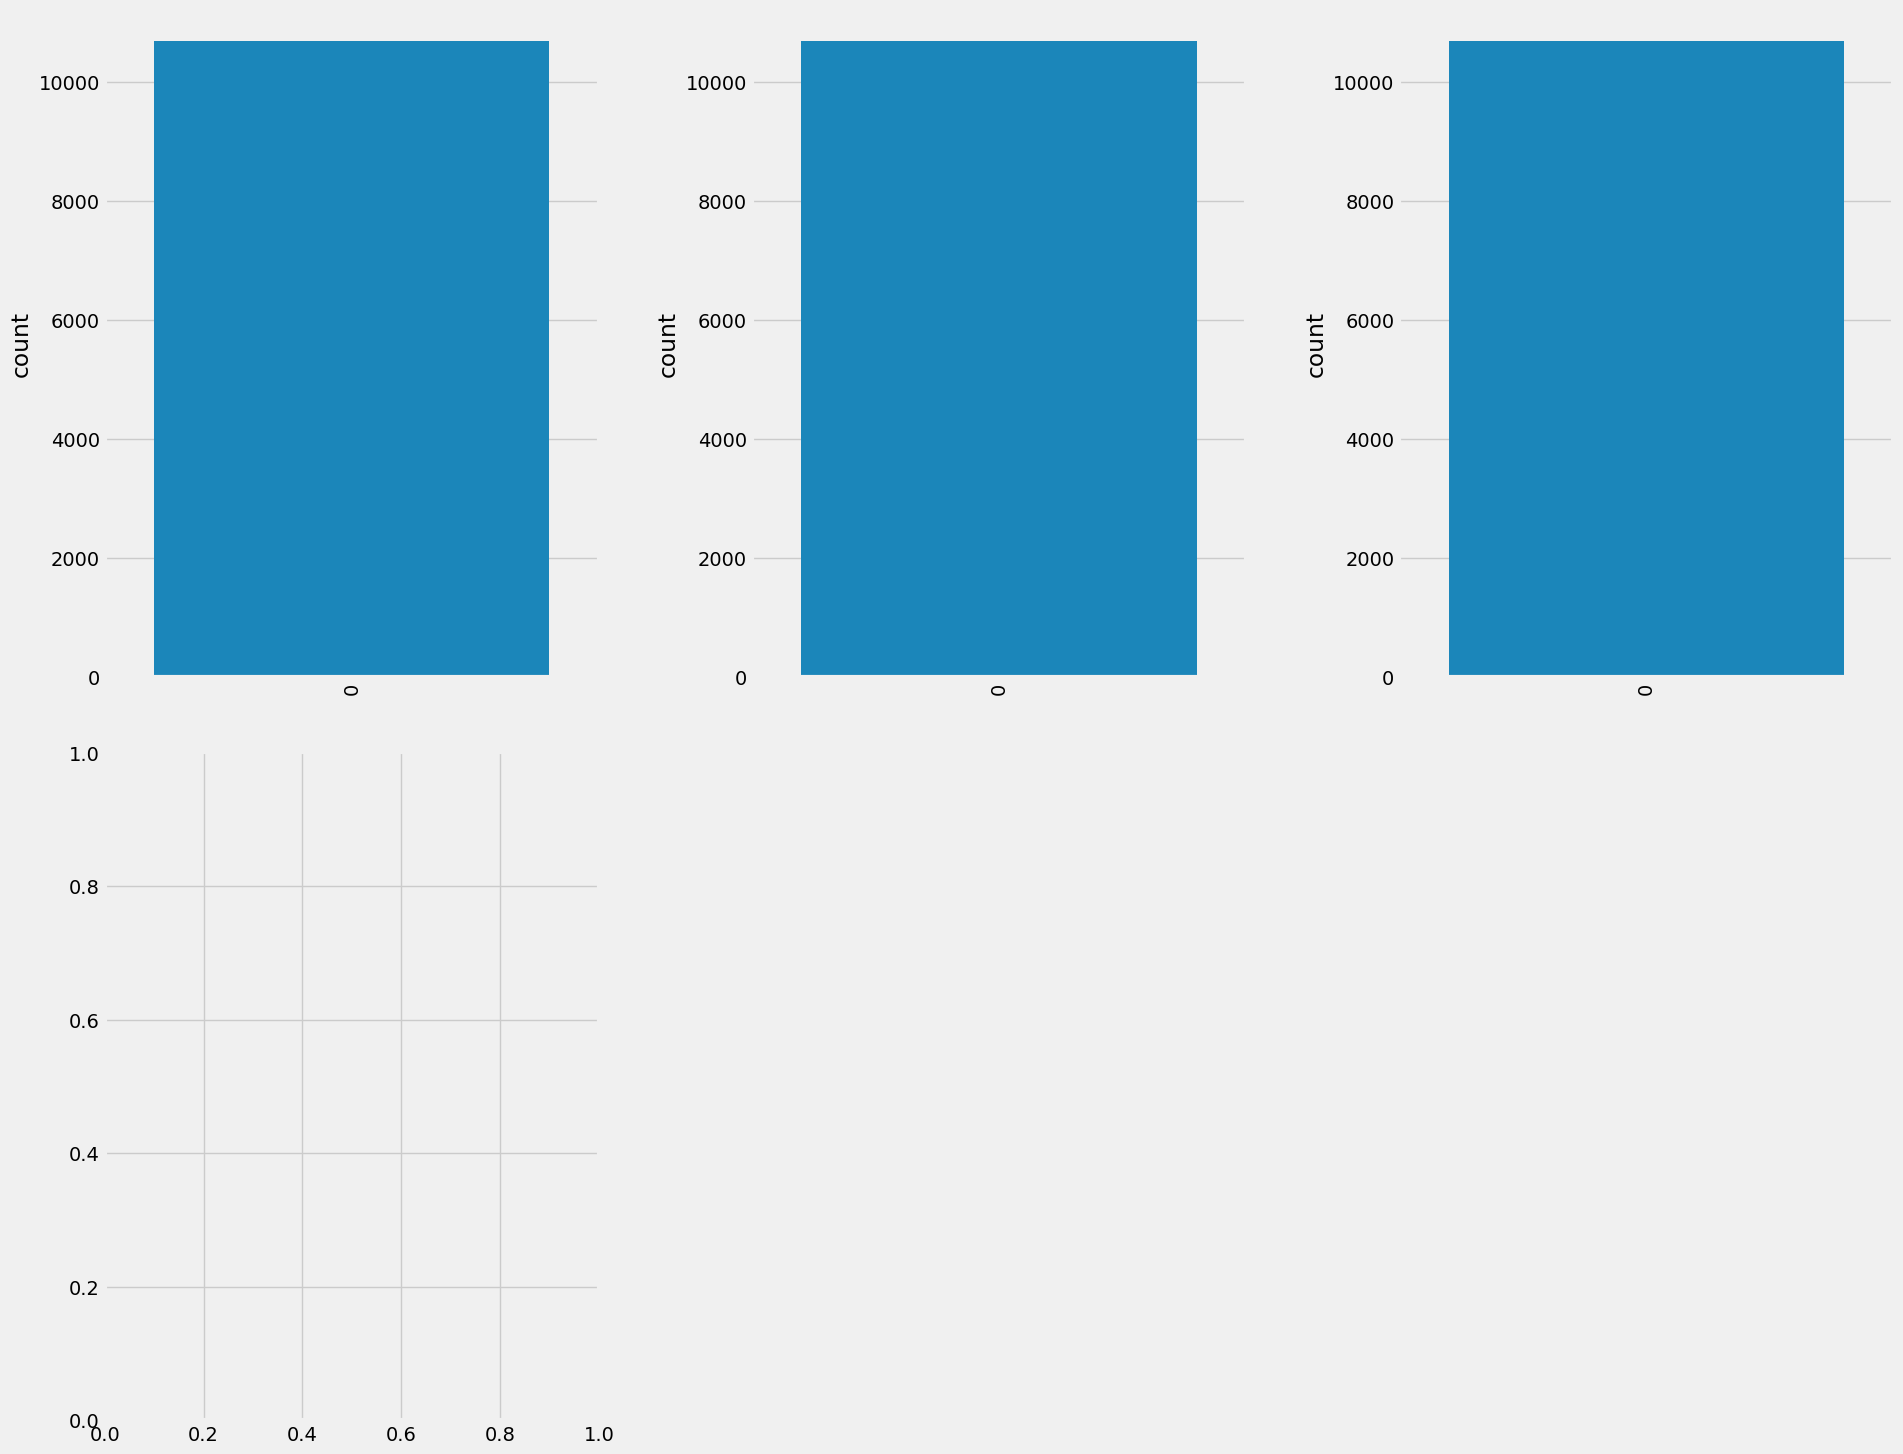

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

c = 1
plt.figure(figsize=(20, 45))

for i in categorical:
    plt.subplot(6,3,c)
    sns.countplot(data[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c = c + 1

plt.show()


<Figure size 1500x800 with 0 Axes>

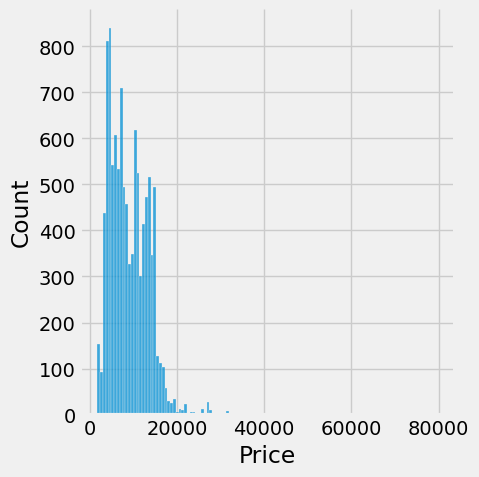

In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd 
plt.figure(figsize=(15,8))
sns.displot(data.Price)

<Axes: >

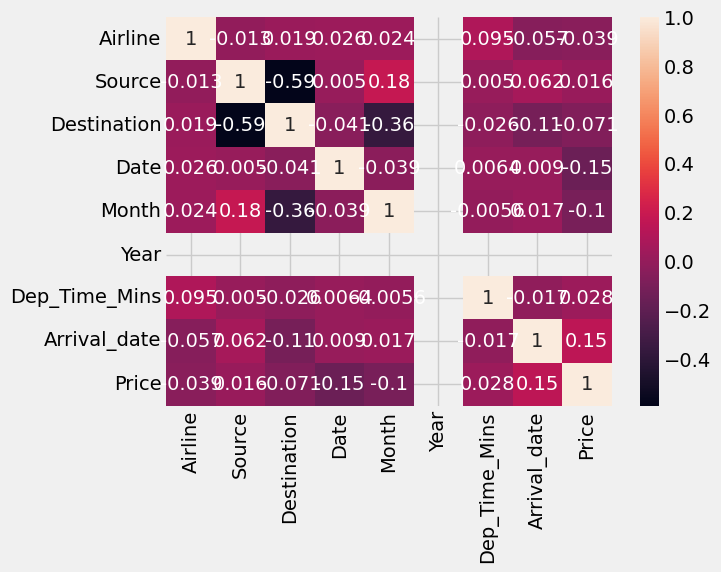

In [ ]:
sns.heatmap(data.corr(),annot=True)

<Axes: >

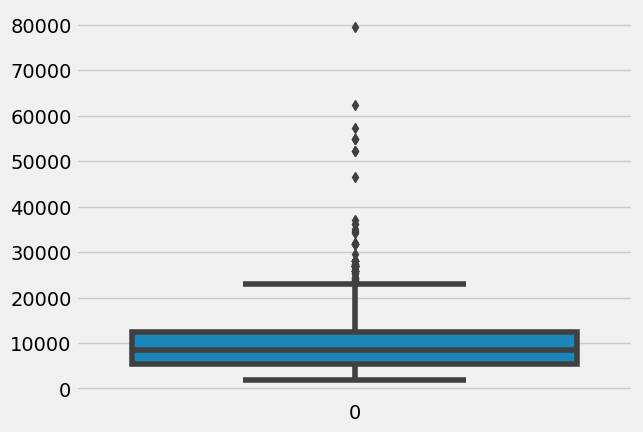

In [ ]:
import seaborn as sns
sns.boxplot(data['Price'])

In [ ]:
y=data['Price']
x=data.drop(columns=['Price'],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [ ]:
x_scaled = ss.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Mins,Arrival_date
0,-0.410805,-1.658435,2.416778,1.237288,-1.467707,0.0,-0.948312,-1.032772
1,-1.261152,0.890299,-0.973732,-1.475307,0.250153,0.0,0.033962,-0.421695
2,0.014369,0.040721,-0.295630,-0.531796,1.109082,0.0,1.343661,-0.116157
3,-0.410805,0.890299,-0.973732,-0.177979,0.250153,0.0,1.016237,-0.421695
4,-0.410805,-1.658435,2.416778,-1.475307,-1.467707,0.0,0.361387,-1.032772


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
                                               

In [ ]:
import pandas as pd

# Convert numpy array to pandas DataFrame
x_train_df = pd.DataFrame(x_train)

# Use head() method to display the first few rows
x_train.head()


,Airline,Source,Destination,Date,Month,Year,Dep_Time_Mins,Arrival_date
10005,6,2,1,27,5,2019,8,9
3684,4,2,1,9,5,2019,1,2
1034,8,2,1,24,4,2019,5,2
3909,6,2,1,21,3,2019,2,1
3088,1,2,1,24,6,2019,7,9


In [ ]:


from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
rfr=RandomForestRegressor()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

for i in [rfr,gb,ad]:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    test_score=r2_score(y_test,y_pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.2:
       print(i)
    
       print("R2 score is",r2_score(y_test,y_pred))
       print("R2 for train data",r2_score(y_train,i.predict(x_train)))
       print("Mean Absolute Error is",mean_absolute_error(y_pred,y_test))
       print("Mean Squared Error is",mean_squared_error(y_pred,y_test))
       print("Root Mean Squared Error is",(mean_squared_error(y_pred,y_test,squared=False)))

RandomForestRegressor()
R2 score is 0.7759482323731272
R2 for train data 0.9012353448624835
Mean Absolute Error is 1499.2920674712411
Mean Squared Error is 4736235.230296826
Root Mean Squared Error is 2176.2893259621583
GradientBoostingRegressor()
R2 score is 0.7561109158437667
R2 for train data 0.7138388970659517
Mean Absolute Error is 1712.5276023394447
Mean Squared Error is 5155576.69952984
Root Mean Squared Error is 2270.5895048488705
AdaBoostRegressor()
R2 score is 0.4547842898283754
R2 for train data 0.41423944303664395
Mean Absolute Error is 2655.013684569659
Mean Squared Error is 11525326.856276201
Root Mean Squared Error is 3394.8971790433066


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

knn = KNeighborsRegressor()
svr = SVR()
dt = DecisionTreeRegressor()

for i in [knn, svr,dt]:  # Updated list of models
    i.fit(x_train, y_train)
    y_pred = i.predict(x_test)
    test_score = r2_score(y_test, y_pred)
    train_score = r2_score(y_train, i.predict(x_train))
    if abs(train_score - test_score) <= 0.1:
        print(i)
        print('R2 Score is', r2_score(y_test, y_pred))
        print('R2 Score for train data', r2_score(y_train, i.predict(x_train)))
        print('Mean Absolute Error is', mean_absolute_error(y_test, y_pred))
        print('Mean Squared Error is', mean_squared_error(y_test, y_pred))
        print('Root Mean squared Error is', mean_squared_error(y_test, y_pred, squared=False))


KNeighborsRegressor()
R2 Score is 0.6303121728335721
R2 Score for train data 0.7277426646022794
Mean Absolute Error is 1996.8173139915768
Mean Squared Error is 7814839.087337389
Root Mean squared Error is 2795.5033692230436
SVR()
R2 Score is -0.03013595663540225
R2 Score for train data -0.023077349438082262
Mean Absolute Error is 3629.630436842972
Mean Squared Error is 21776066.58268975
Root Mean squared Error is 4666.483320734121


In [ ]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
    cv=cross_val_score(rfr,x_train,y_train,cv=i)
    print(rfr,cv.mean())

RandomForestRegressor() 0.6866637663835589
RandomForestRegressor() 0.6924805761044773
RandomForestRegressor() 0.715985050953607


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid={'n_estimators':[10,30,50,70,100],'max_depth':[None,1,2,3],'max_features':['auto','sqrt']}
rfr=RandomForestRegressor()
rf_res=RandomizedSearchCV(estimator=rfr,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)
rf_res.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [ ]:
gb=GradientBoostingRegressor()
gb_res=RandomizedSearchCV(estimator=gb,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)
gb_res.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [ ]:
rfr=RandomForestRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))




train accuracy 0.8616241834015144
test accuracy 0.6688226392068832


In [ ]:
knn=KNeighborsRegressor(n_neighbors=2,algorithm='auto',metric_params=None,n_jobs=-1)
knn.fit(x_train,y_train)
y_train_pred=knn.predict(x_train)
y_test_pred=knn.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))


train accuracy 0.7916377179223582
test accuracy 0.5052591930555634


In [ ]:
rfr=RandomForestRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))


train accuracy 0.8700226171135005
test accuracy 0.6818806290639117


In [ ]:
Price_list = pd.DataFrame({'Price':data['Price']})
Price_list

,Price
0,3897
1,7662
2,13882
3,6218
4,13302
...,...
10678,4107
10679,4145
10680,7229
10681,12648


In [ ]:
import pickle
pickle.dump(rfr,open('model1.pkl','wb'))
